<h1>[A00] IMPORT LIBRARIES</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

<h1>[A01] DATA LOADING & BASIC CHECKS</h1>

In [1]:
# pdf01=pd.read_csv("data.csv")

In [2]:
# pdf01.head(5)

In [4]:
pdf01.shape

(1000, 13)

In [5]:
pdf01.columns

Index(['age', 'work_class', 'education', 'education_num', 'marital_status',
       'occupation', 'ethnicity', 'gender', 'capital_gain', 'capital_loss',
       'hour_per_week', 'native_country', 'income_level'],
      dtype='object')

In [6]:
pdf01.dtypes

age                int64
work_class        object
education         object
education_num      int64
marital_status    object
occupation        object
ethnicity         object
gender            object
capital_gain       int64
capital_loss       int64
hour_per_week      int64
native_country    object
income_level      object
dtype: object

<h1>[B00] CENTRAL TENDENCY STATISTICS</h1>

In [7]:
pdf01["age"].describe()

count    1000.00000
mean       38.05100
std        13.34948
min        17.00000
25%        28.00000
50%        36.00000
75%        46.00000
max        90.00000
Name: age, dtype: float64

In [74]:
for i in range(9):
    print("%g%% quantile of age is: %g"%((i+1)*10,pdf01["age"].quantile((i+1)*.1)))

10% quantile of age is: 22
20% quantile of age is: 25.8
30% quantile of age is: 29.7
40% quantile of age is: 33
50% quantile of age is: 36
60% quantile of age is: 41
70% quantile of age is: 44
80% quantile of age is: 49
90% quantile of age is: 57


<h1>[C00] INTRODUCING WORDCLOUD WITH PYTHON</h1>

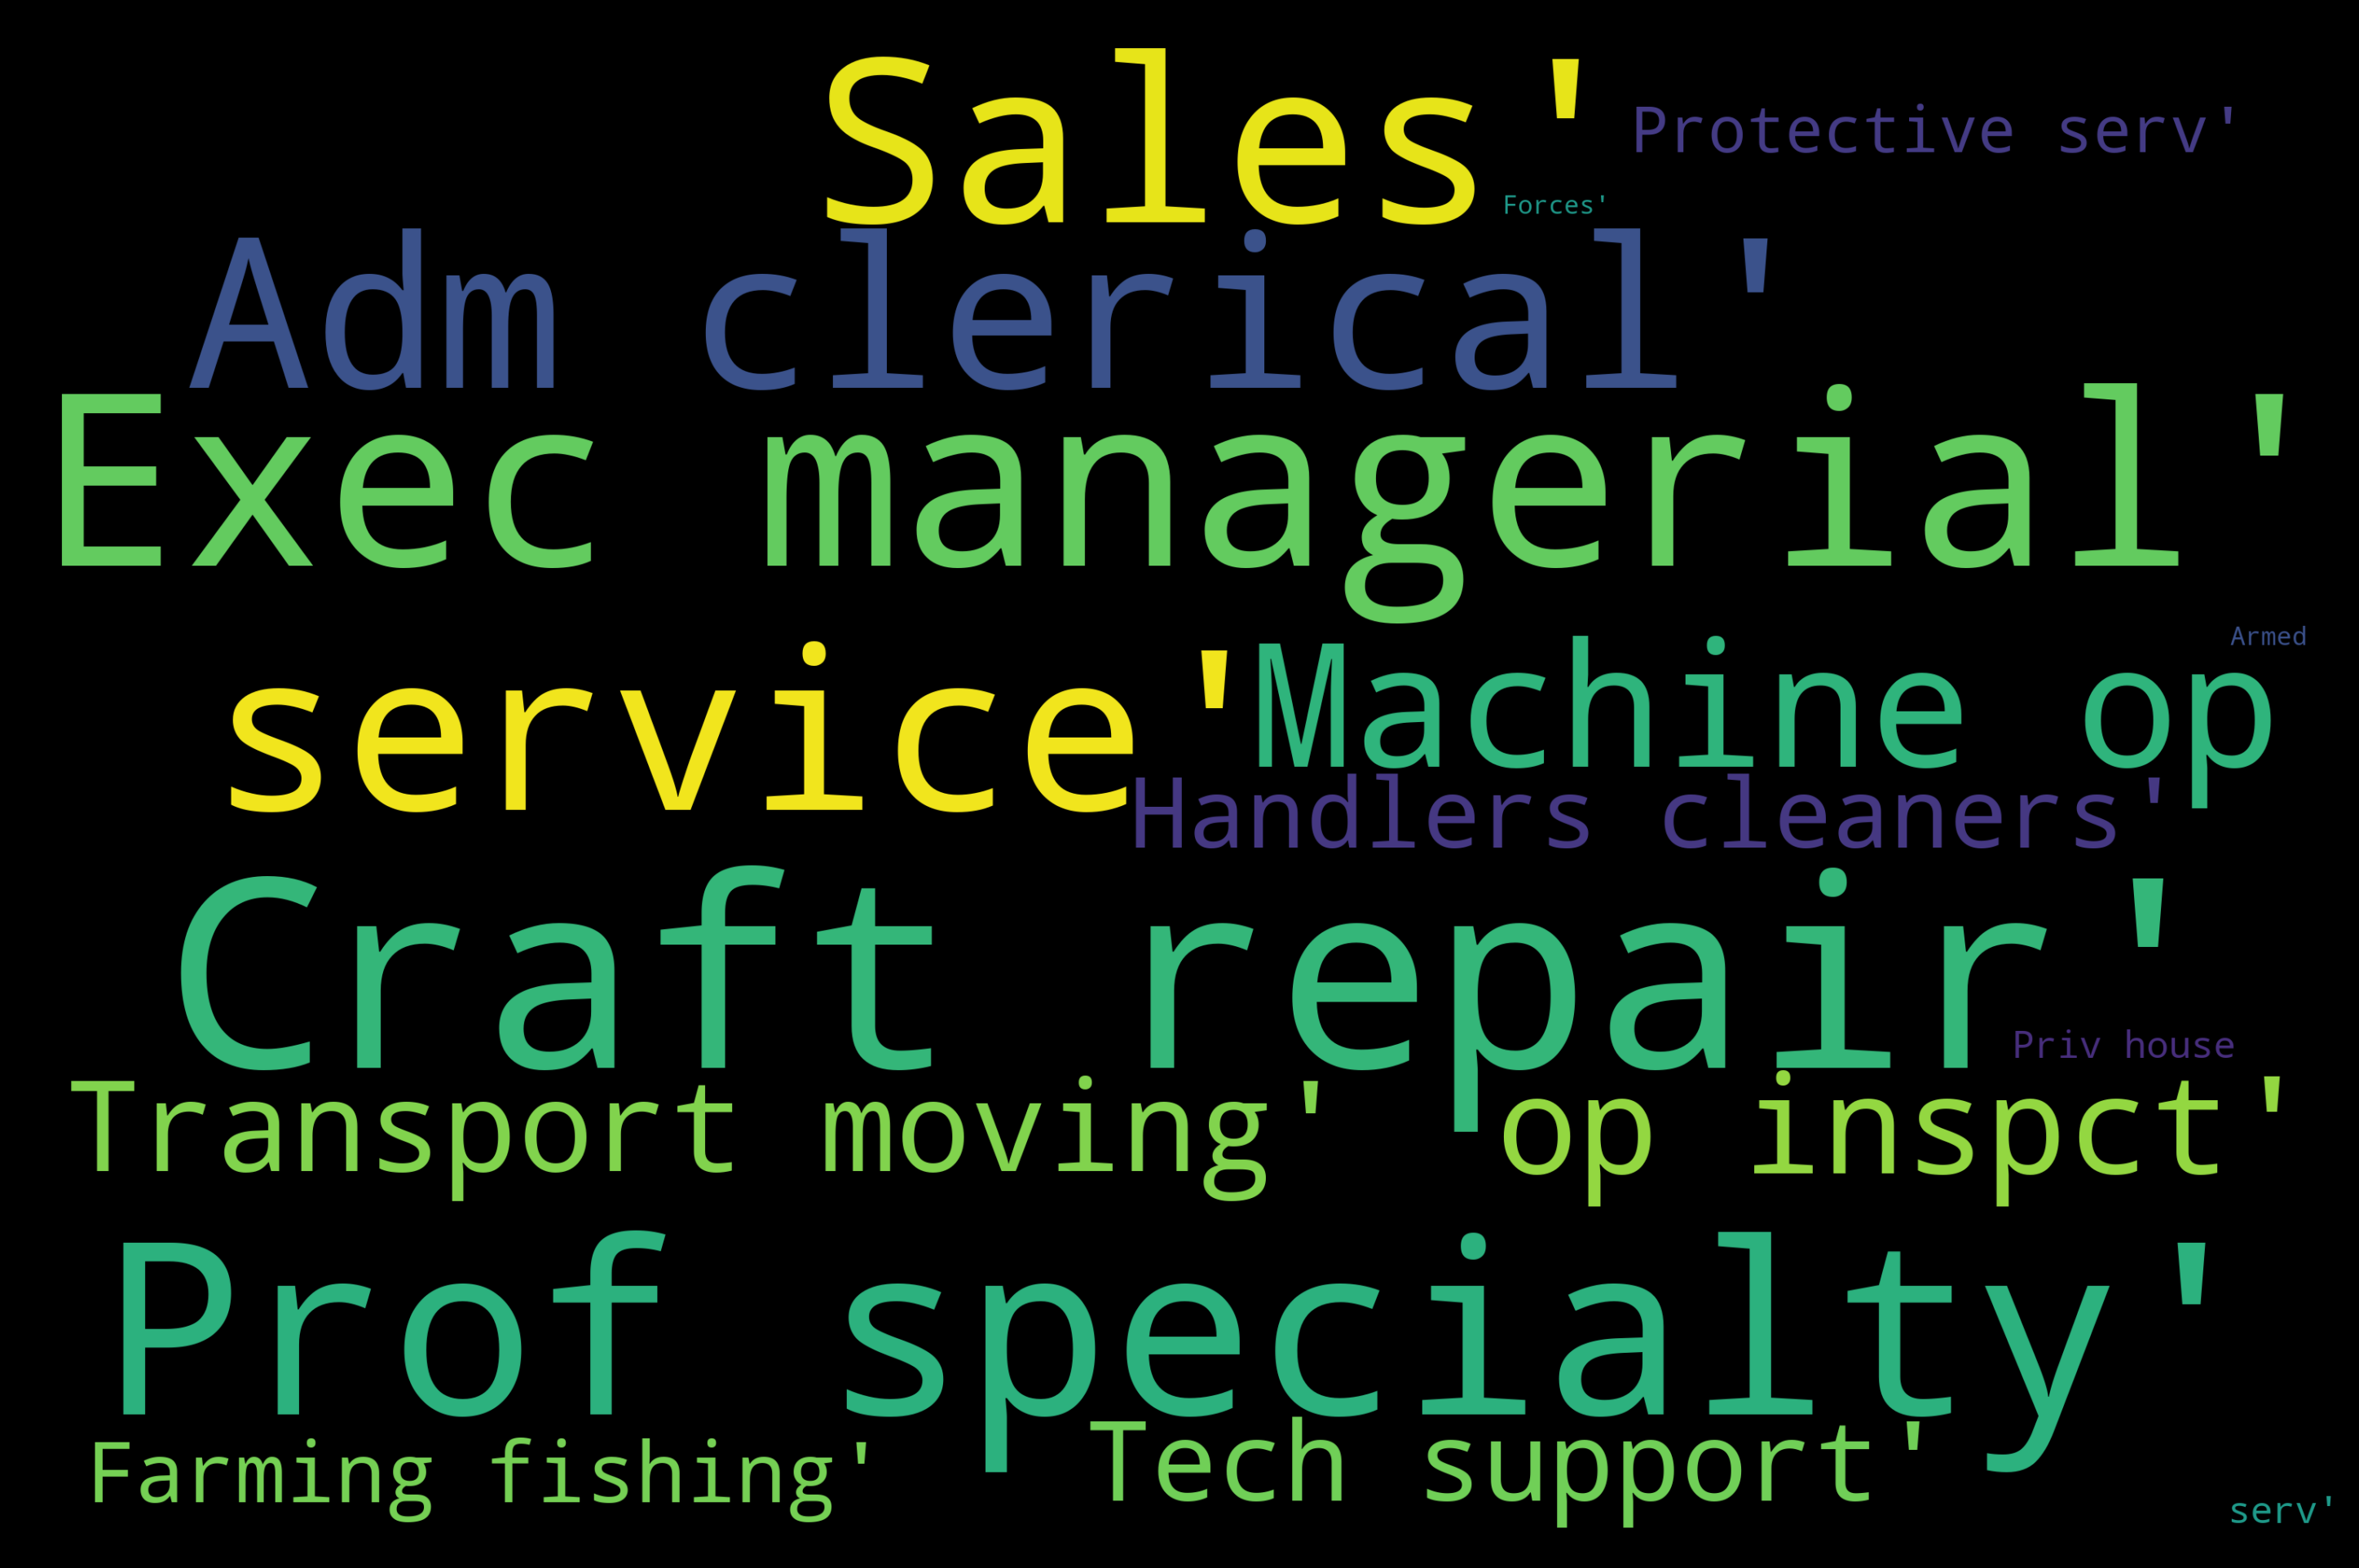

In [8]:
text=pdf01.occupation.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS
).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


<h1>[C01] INTRODUCING PIE CHART WITH PYTHON</h1>

In [9]:
pdf02=pdf01.groupby("marital_status").agg({"age": ["count"]})["age"].reset_index()

In [10]:
pdf02.head(20)

,marital_status,count
0,Divorced,136
1,Married-AF-spouse,1
2,Married-civ-spouse,443
3,Married-spouse-absent,15
4,Never-married,344
5,Separated,28
6,Widowed,33


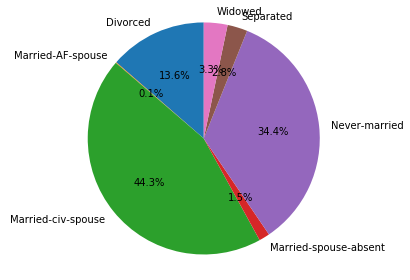

In [32]:
plt.pie(
    pdf02['count'],
    labels=pdf02['marital_status'],
    shadow=False,
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
)
plt.axis('equal')
plt.tight_layout()
plt.show()

<h1>[C02] INTRODUCING BAR CHART WITH PYTHON</h1>

In [35]:
pdf03=pdf01.groupby("education").agg({"age": ["count"]})["age"].reset_index()

In [36]:
pdf03.head(20)

,education,count
0,10th,21
1,11th,46
2,12th,9
3,1st-4th,7
4,5th-6th,11
5,7th-8th,15
6,9th,16
7,Assoc-acdm,35
8,Assoc-voc,48
9,Bachelors,166


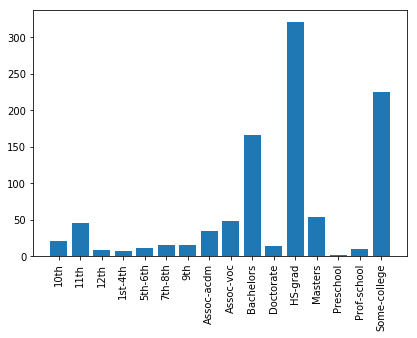

In [43]:
plt.bar(
    pdf03['education'],
    pdf03['count'],
)
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

<h1>[C03] INTRODUCING HISTOGRAM WITH PYTHON</h1>

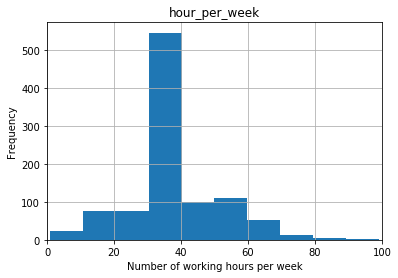

In [65]:
pdf01.hist(column="hour_per_week",bins=10)
plt.xlabel("Number of working hours per week")
plt.ylabel("Frequency")
plt.xlim([0.0,100.0])
plt.show()

<h1>[C04] INTRODUCING BOX PLOT WITH PYTHON</h1>

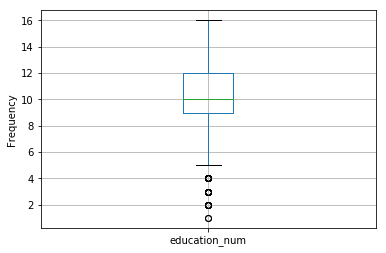

In [62]:
pdf01.boxplot(column="education_num")
plt.ylabel("Frequency")
plt.show()

<h1>[D00] INTRODUCING STANDARDIZATION AND MIN/MAX SCALING</h1>

In [91]:
pdf01["age_std"]=(pdf01["age"]-pdf01["age"].mean())/pdf01["age"].std()

In [98]:
pdf01["age_minmax"]=(pdf01["age"]-pdf01["age"].min())/(pdf01["age"].max()-pdf01["age"].min())

In [101]:
pdf01[["age","age_std","age_minmax"]].head(5)

,age,age_std,age_minmax
0,39,0.071089,0.301370
1,50,0.895091,0.452055
2,38,-0.003820,0.287671
3,53,1.119819,0.493151
4,28,-0.752913,0.150685
